In [23]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

In [63]:
filepath = "data/subj-101.csv"

In [64]:
data = pd.read_csv(filepath)

In [65]:
data

,subject_id,group,block,trial_in_block,trial_coherence,trial_perturb,trial_type,reach_dur,reach_rt,trial_directions,trial_target,aim_target,reach_target,auc_from_target,auc_from_min,coh_cat
0,101,1,1,0,0.0,0.0,-1,0.483481,0.516580,0,1,-31.105400,-15.040465,1424.781291,687.798501,zero
1,101,1,1,1,0.0,0.0,-1,0.041695,0.508480,0,1,-30.000000,-24.703939,105.683194,6.867438,zero
2,101,1,1,2,0.0,0.0,-1,0.083335,0.408484,0,1,4.667365,-4.427134,35.112155,35.112155,zero
3,101,1,1,3,0.0,0.0,-1,inf,0.375112,0,1,-11.535846,1.773819,145.575677,49.789444,zero
4,101,1,1,4,0.0,0.0,-1,NaN,NaN,0,1,NaN,NaN,NaN,NaN,zero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,101,1,9,51,0.0,0.0,2,0.049997,0.566871,0,2,-62.469437,-37.815823,317.852323,90.957383,zero
456,101,1,9,52,0.0,0.0,2,0.083341,0.541857,0,2,-23.487057,-9.111215,132.395340,50.394408,zero
457,101,1,9,53,0.0,0.0,2,0.075035,0.425117,0,2,-14.765458,-6.489465,58.091387,19.154598,zero
458,101,1,9,54,0.0,0.0,2,0.041681,0.541822,0,2,-23.634700,-2.212164,75.704210,64.643390,zero


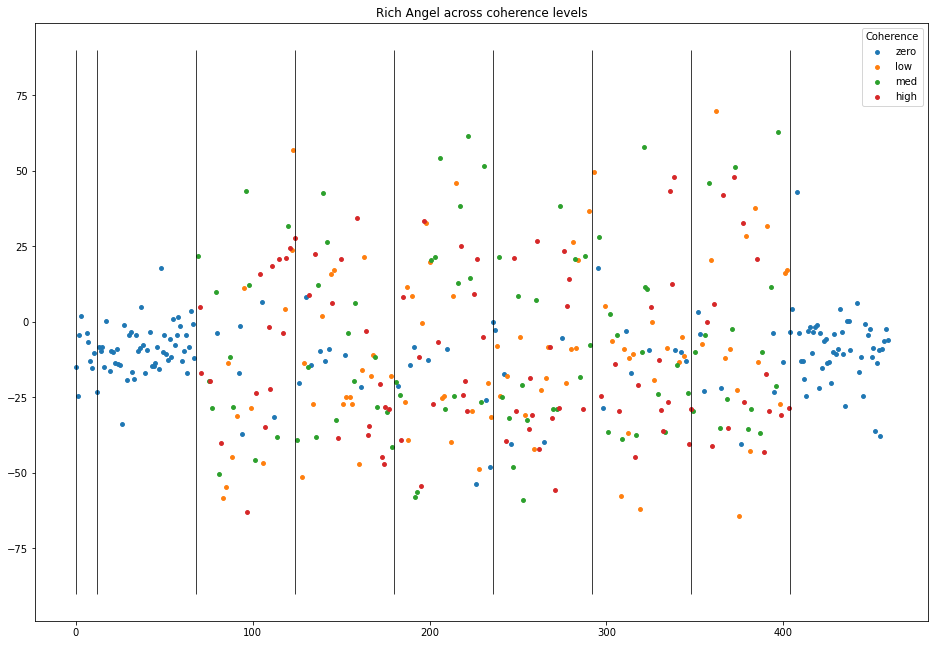

In [66]:
f, ax = plt.subplots(figsize=(16, 11))
f.patch.set_facecolor("white")
for i in data.coh_cat.unique():
    y = data[data.coh_cat == i]
    x = y.index.to_numpy()
    ax.scatter(x, y.reach_target, label=i, s=15)
ax.legend(title="Coherence")
ax.vlines(np.where(data.trial_in_block == 0)[0], ymin=-90, ymax=90, color="black", lw=0.75)
plt.title("Rich Angel across coherence levels");

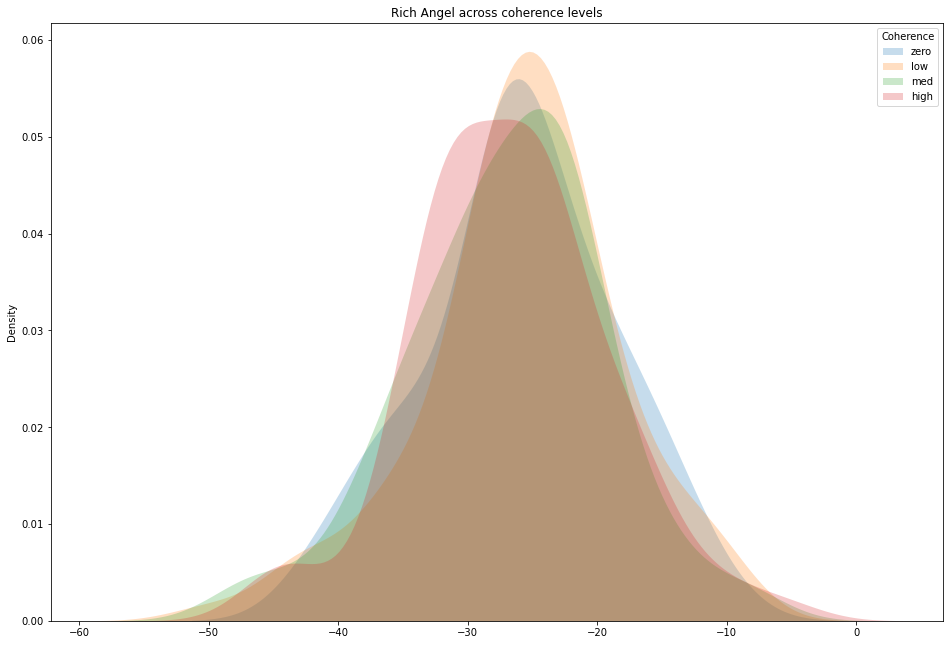

In [57]:
f, ax = plt.subplots(figsize=(16, 11))
f.patch.set_facecolor("white")
for i in data.coh_cat.unique():
    y = data[(data.coh_cat == i) & (data.block > 2) & (data.block < 9)].reach_target.to_numpy()
    y = y[np.isfinite(y)]
    sns.kdeplot(y, ax=ax, fill=True, lw=0, label=i)
ax.legend(title="Coherence")
plt.title("Rich Angel across coherence levels");

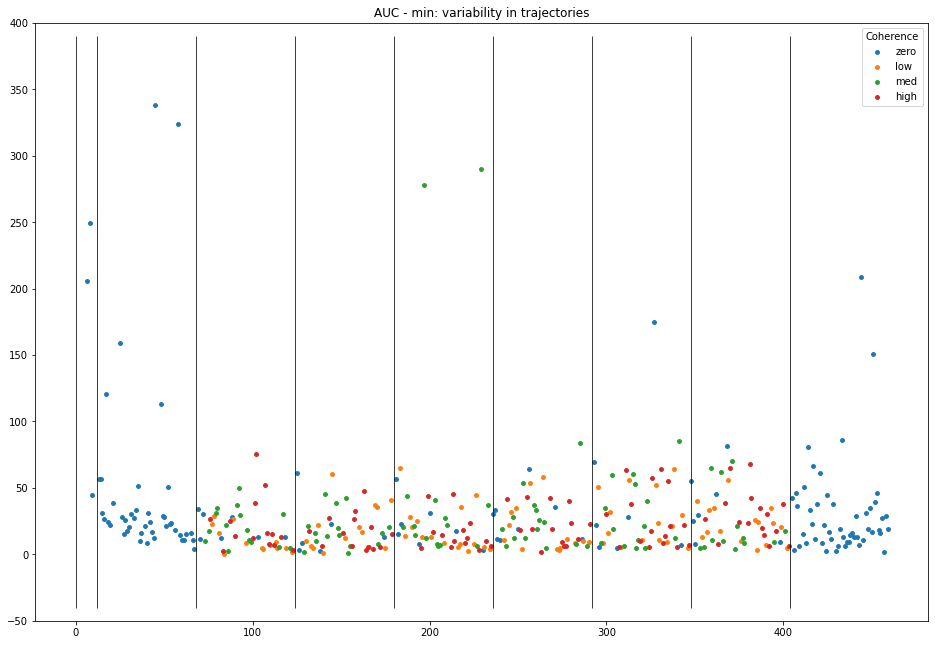

In [58]:
f, ax = plt.subplots(figsize=(16, 11))
f.patch.set_facecolor("white")
for i in data.coh_cat.unique():
    y = data[data.coh_cat == i]
    x = y.index.to_numpy()
    ax.scatter(x, y.auc_from_min, label=i, s=15)
ax.legend(title="Coherence")
ax.vlines(np.where(data.trial_in_block == 0)[0], ymin=-40, ymax=390, color="black", lw=0.75)
plt.ylim(-50, 400)
plt.title("AUC - min: variability in trajectories");

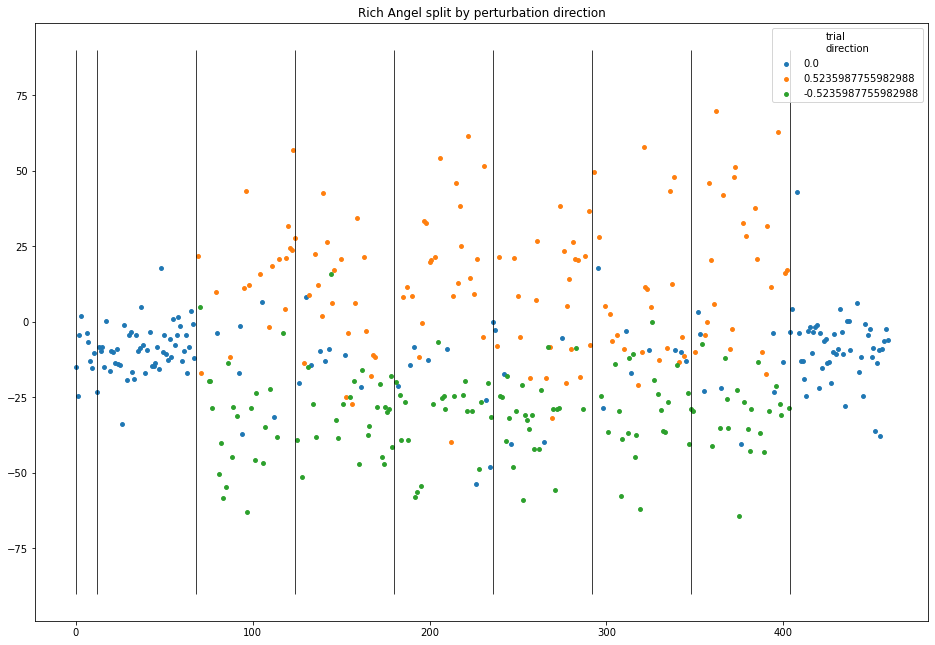

In [67]:
f, ax = plt.subplots(figsize=(16, 11))
f.patch.set_facecolor("white")
for i in data.trial_perturb.unique():
    y = data[data.trial_perturb == i]
    x = y.index.to_numpy()
    ax.scatter(x, y.reach_target, label=i, s=15)
ax.legend(title="trial\ndirection")
ax.vlines(np.where(data.trial_in_block == 0)[0], ymin=-90, ymax=90, color="black", lw=0.75)
plt.title("Rich Angel split by perturbation direction");

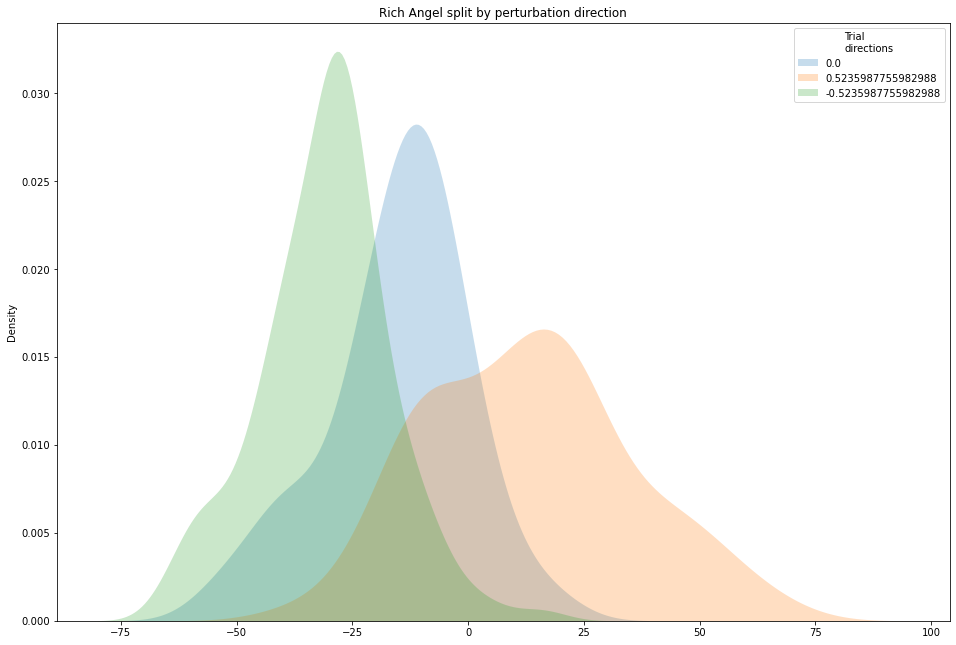

In [68]:
f, ax = plt.subplots(figsize=(16, 11))
f.patch.set_facecolor("white")
for i in data.trial_perturb.unique():
    y = data[(data.trial_perturb == i) & (data.block > 2) & (data.block < 9)].reach_target.to_numpy()
    y = y[np.isfinite(y)]
    sns.kdeplot(y, ax=ax, fill=True, lw=0, label=i)
ax.legend(title="Trial\ndirections")
plt.title("Rich Angel split by perturbation direction");

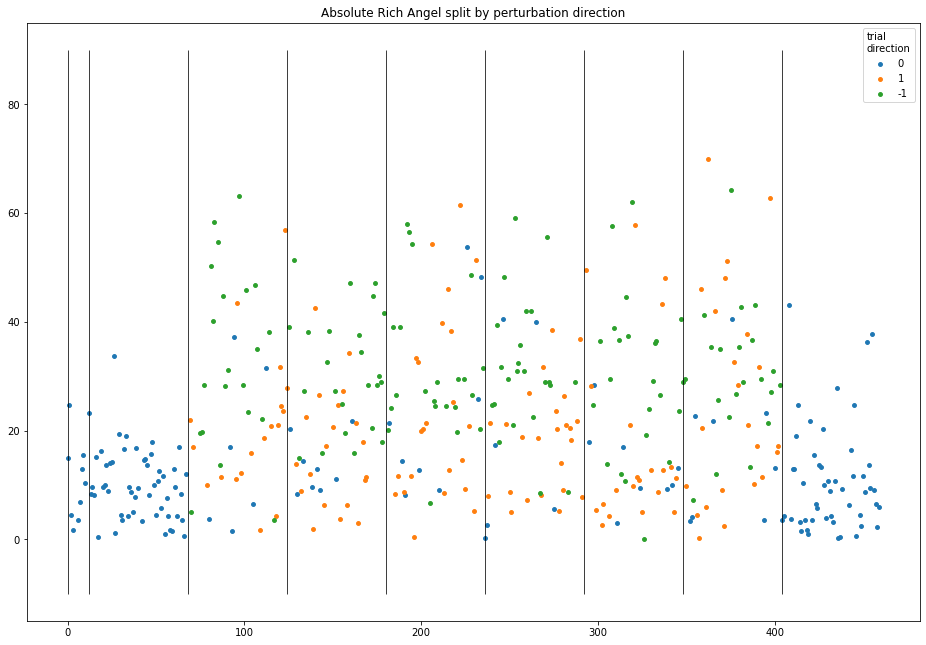

In [36]:
f, ax = plt.subplots(figsize=(16, 11))
f.patch.set_facecolor("white")
for i in data.trial_directions.unique():
    y = data[data.trial_directions == i]
    x = y.index.to_numpy()
    ax.scatter(x, np.abs(y.reach_target), label=i, s=15)
ax.legend(title="trial\ndirection")
ax.vlines(np.where(data.trial_in_block == 0)[0], ymin=-10, ymax=90, color="black", lw=0.75)
plt.title("Absolute Rich Angel split by perturbation direction");

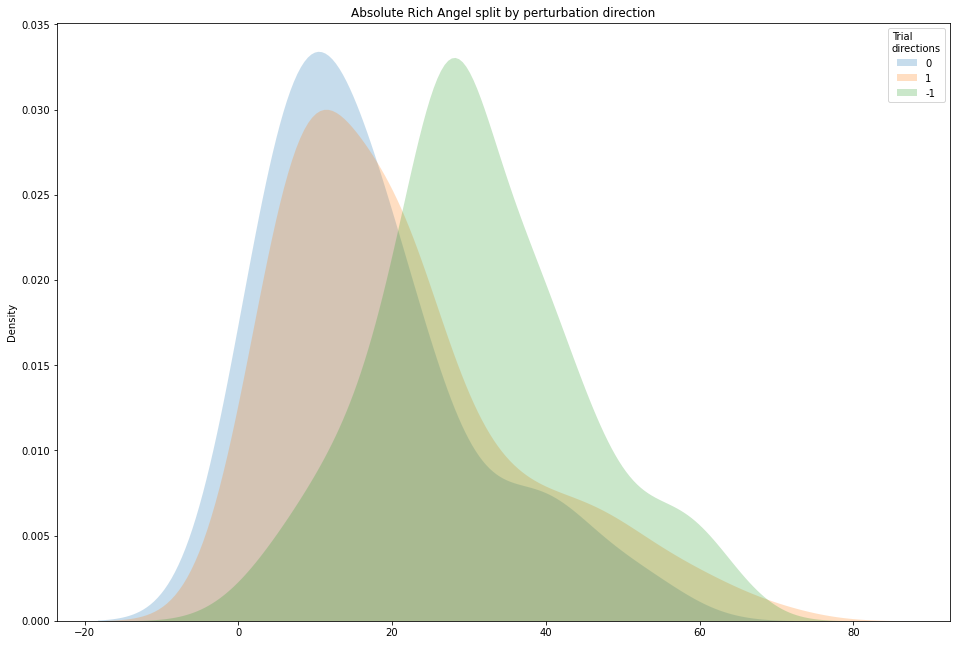

In [45]:
f, ax = plt.subplots(figsize=(16, 11))
f.patch.set_facecolor("white")
for i in data.trial_directions.unique():
    y = data[(data.trial_directions == i) & (data.block > 2) & (data.block < 9)].reach_target.to_numpy()
    y = np.abs(y[np.isfinite(y)])
    sns.kdeplot(y, ax=ax, fill=True, lw=0, label=i)
ax.legend(title="Trial\ndirections")
plt.title("Absolute Rich Angel split by perturbation direction");